# Initial Analysis of Olympic Data

## Exploratory Analyis

* how have the olympic games grown over the years? 
* how have athletes changed over the years

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os

In [4]:
athlete = pd.read_csv('input/athlete_events.csv')
noc = pd.read_csv('input/noc_regions.csv')

print('Athlete data: \nRows: {}\nCols: {}'.format(athlete.shape[0],athlete.shape[1]))
print(athlete.columns)

print('\nNOC data: \nRows: {}\nCols: {}'.format(noc.shape[0],noc.shape[1]))
print(noc.columns)

Athlete data: 
Rows: 271116
Cols: 15
Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

NOC data: 
Rows: 230
Cols: 3
Index(['NOC', 'region', 'notes'], dtype='object')


### Let's look at the first entries of the NOC data and Athlete Data

In [5]:
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


## Filter on athletes with incomplete data

Since we are trying eventually use the data from each individual athlete to predict the sport they are participating in, we are going to filter on incomplete data. 

In [8]:
athlete_filt = athlete[(athlete['Sex'].notnull()) & (athlete['Age'].notnull()) & (athlete['Height'].notnull())  & (athlete['Weight'].notnull()) & (athlete['NOC'].notnull()) & (athlete['Year'].notnull()) & (athlete['Season'].notnull()) & (athlete['Sport'].notnull())]


In [37]:
#AthletesFiltered_Summer = athlete_filt.loc[(athlete_filt['Season'].isin(["Summer"])) & (athlete_filt['Year'] >= 1968)]
AthletesFiltered_Summer = athlete_filt.loc[(athlete_filt['Season'].isin(["Summer"]))]

print(AthletesFiltered_Summer.shape) 

athlete = AthletesFiltered_Summer

(166706, 15)


## Initial Plotting (How have the games changed in the last 50 years?)

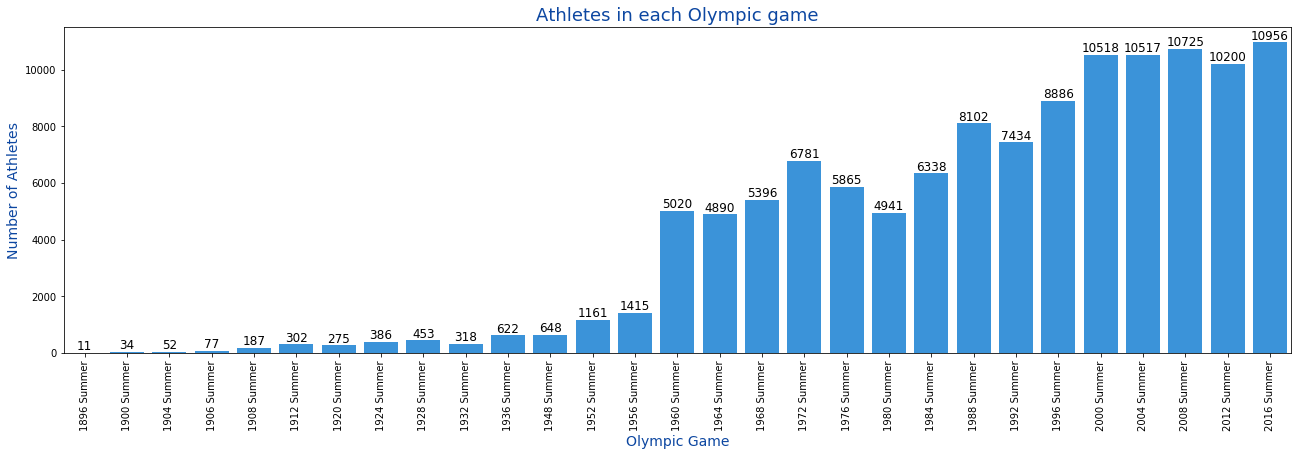

In [38]:
games_athletes = athlete.pivot_table(athlete, index=['Games'], aggfunc=lambda x: len(x.unique())).reset_index()[['Games','ID']]
fig, ax = plt.subplots(figsize=(22,6))
a = sns.barplot(x='Games', y='ID', data=games_athletes, ax=ax, color="#2196F3")
a.set_xticklabels(labels=games_athletes['Games'],rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

ax.set_xlabel('Olympic Game', size=14, color="#0D47A1")
ax.set_ylabel('Number of Athletes', size=14, color="#0D47A1")
ax.set_title('Athletes in each Olympic game', size=18, color="#0D47A1")

plt.show()

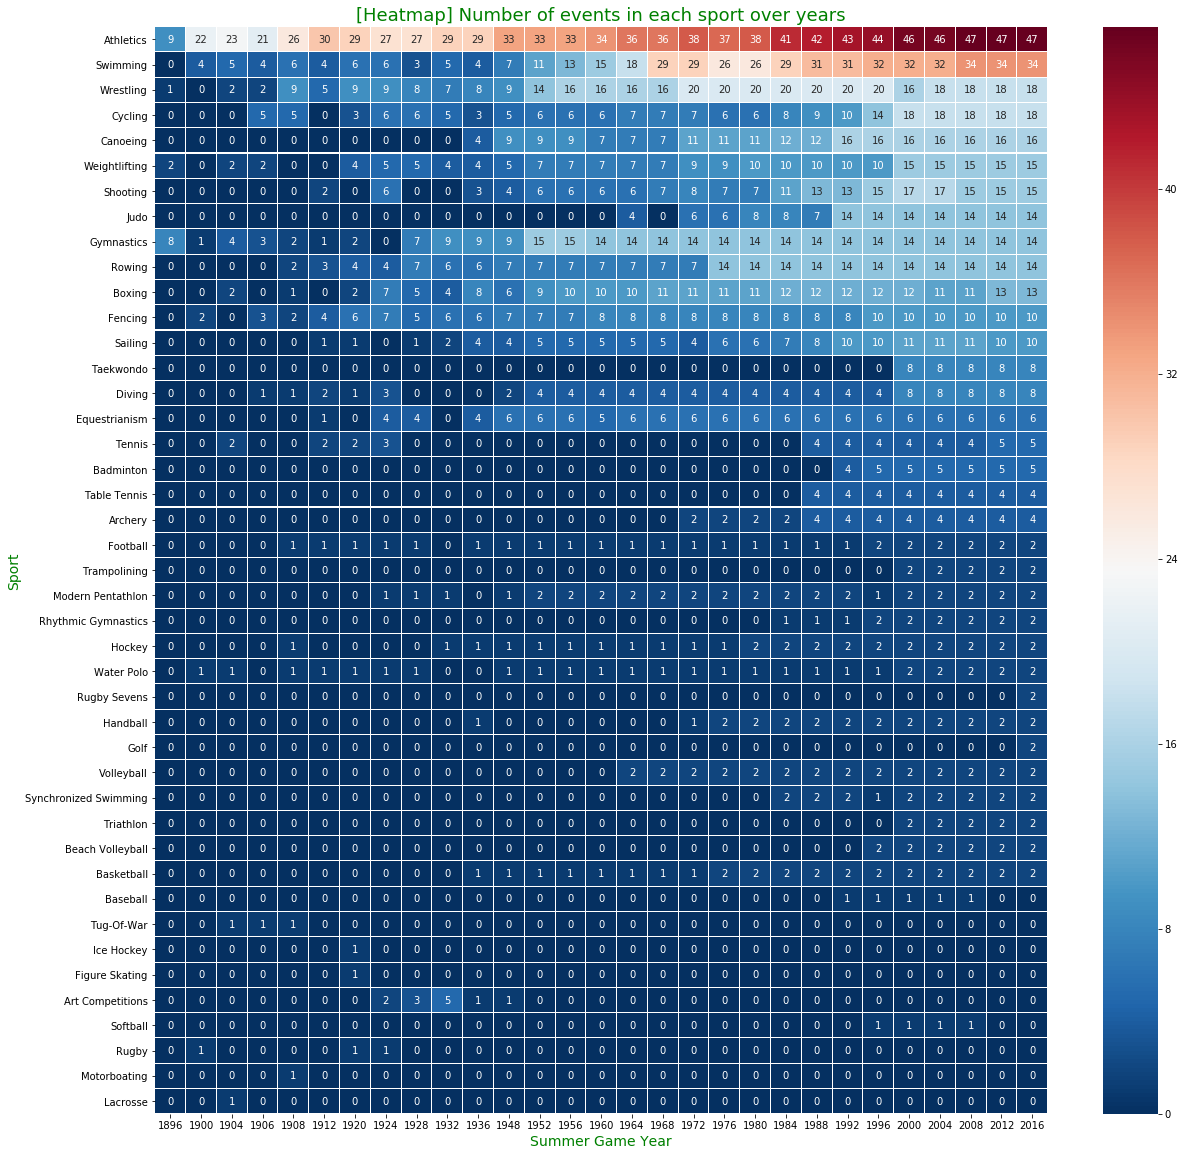

In [39]:
sport_year = athlete[athlete['Season']=='Summer'].pivot_table(athlete, index=['Year','Sport'], aggfunc=lambda x: len(x.unique())).reset_index()[['Year','Sport','Event']]
sport_year = sport_year.pivot("Sport", "Year", "Event")
sport_year.fillna(0,inplace=True)
sport_year = sport_year.reindex(sport_year.sort_values(by=2016, ascending=False).index)
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(sport_year, annot=True, linewidths=0.05, ax=ax, cmap="RdBu_r")
ax.set_xlabel('Summer Game Year', size=14, color="green")
ax.set_ylabel('Sport', size=14, color="green")
ax.set_title('[Heatmap] Number of events in each sport over years', size=18, color="green")
plt.show()

# How have the athletes changed?


* We are initially going to look at 3 simple metrics, Age, Weight and Height


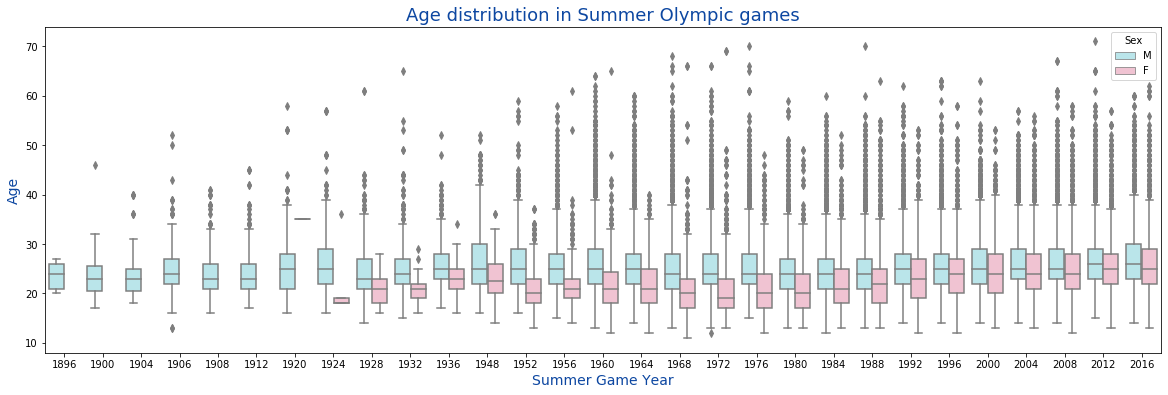

In [41]:
fig, ax = plt.subplots(figsize=(20,6))
a = sns.boxplot(x="Year", y="Age", hue="Sex", palette={"M": "#B2EBF2", "F":"#F8BBD0"}, data=athlete[athlete['Season']=='Summer'], ax=ax)
        
ax.set_xlabel('Summer Game Year', size=14, color="#0D47A1")
ax.set_ylabel('Age', size=14, color="#0D47A1")
ax.set_title('Age distribution in Summer Olympic games', size=18, color="#0D47A1")
plt.show()

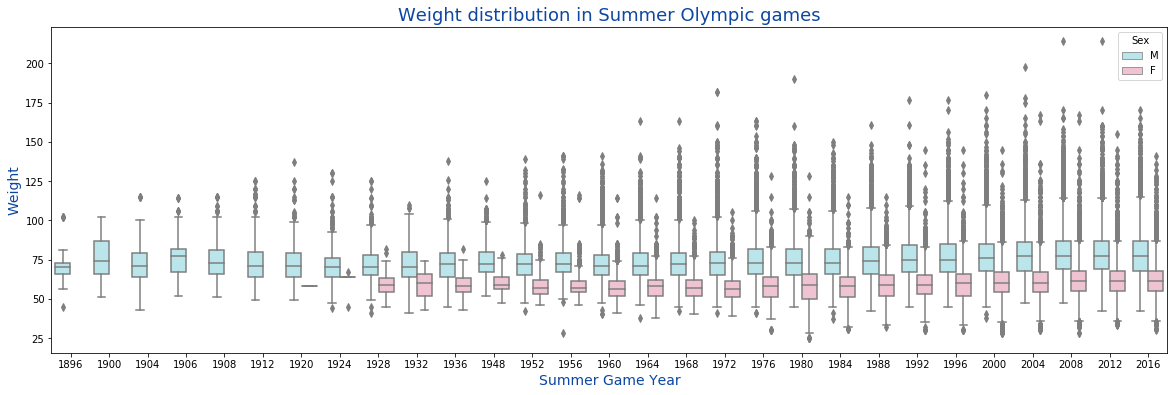

In [42]:
fig, ax = plt.subplots(figsize=(20,6))
a = sns.boxplot(x="Year", y="Weight", hue="Sex", palette={"M": "#B2EBF2", "F":"#F8BBD0"}, data=athlete[athlete['Season']=='Summer'], ax=ax)
        
ax.set_xlabel('Summer Game Year', size=14, color="#0D47A1")
ax.set_ylabel('Weight', size=14, color="#0D47A1")
ax.set_title('Weight distribution in Summer Olympic games', size=18, color="#0D47A1")
plt.show()

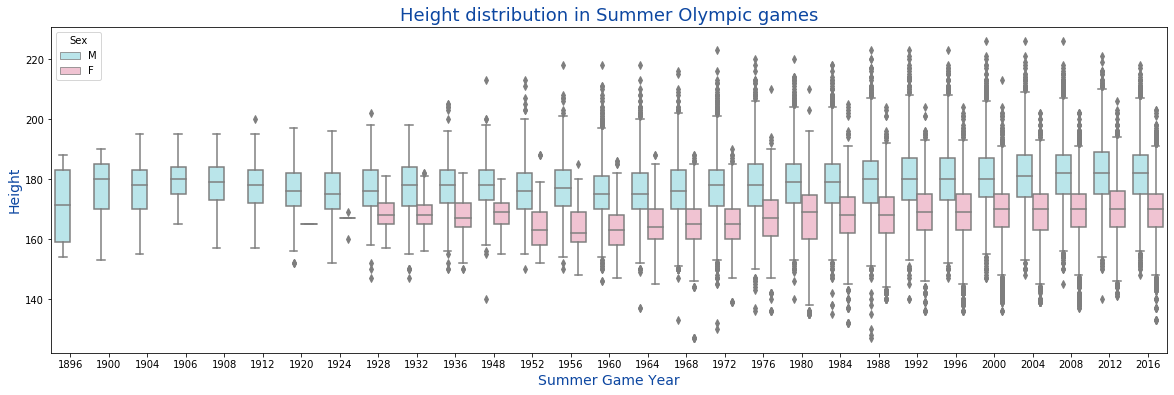

In [43]:
fig, ax = plt.subplots(figsize=(20,6))
a = sns.boxplot(x="Year", y="Height", hue="Sex", palette={"M": "#B2EBF2", "F":"#F8BBD0"}, data=athlete[athlete['Season']=='Summer'], ax=ax)
        
ax.set_xlabel('Summer Game Year', size=14, color="#0D47A1")
ax.set_ylabel('Height', size=14, color="#0D47A1")
ax.set_title('Height distribution in Summer Olympic games', size=18, color="#0D47A1")
plt.show()

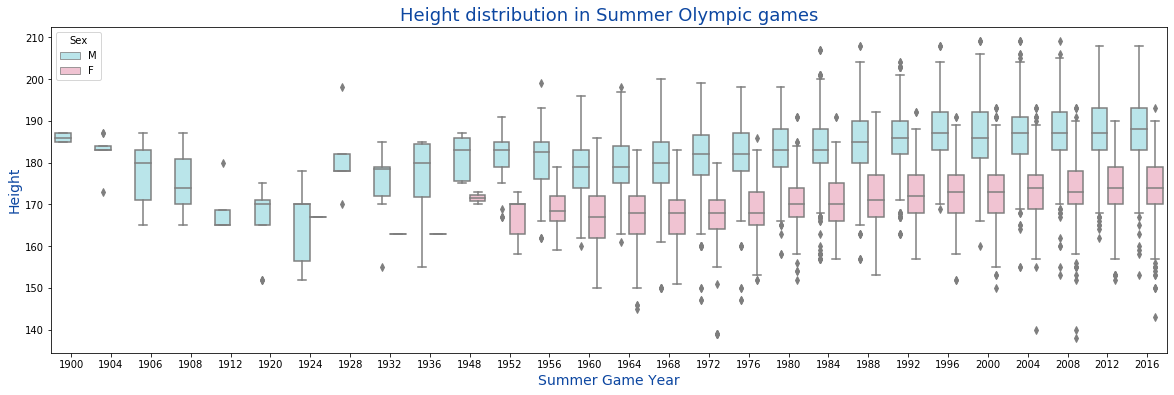

In [44]:
fig, ax = plt.subplots(figsize=(20,6))
a = sns.boxplot(x="Year", y="Height", hue="Sex", palette={"M": "#B2EBF2", "F":"#F8BBD0"}, data=athlete[(athlete['Season']=='Summer') & (athlete['Sport']=="Swimming")], ax=ax)
        
ax.set_xlabel('Summer Game Year', size=14, color="#0D47A1")
ax.set_ylabel('Height', size=14, color="#0D47A1")
ax.set_title('Height distribution in Summer Olympic games', size=18, color="#0D47A1")
plt.show()

# Now for a predictive model

In [46]:
# Let's if we can predict the sport of an athlete based on their body measurements

AthletesFiltered_Summer = athlete_filt.loc[(athlete_filt['Season'].isin(["Summer"])) & (athlete_filt['Year'] >= 1968)]
print(AthletesFiltered_Summer.shape) 



(142506, 15)


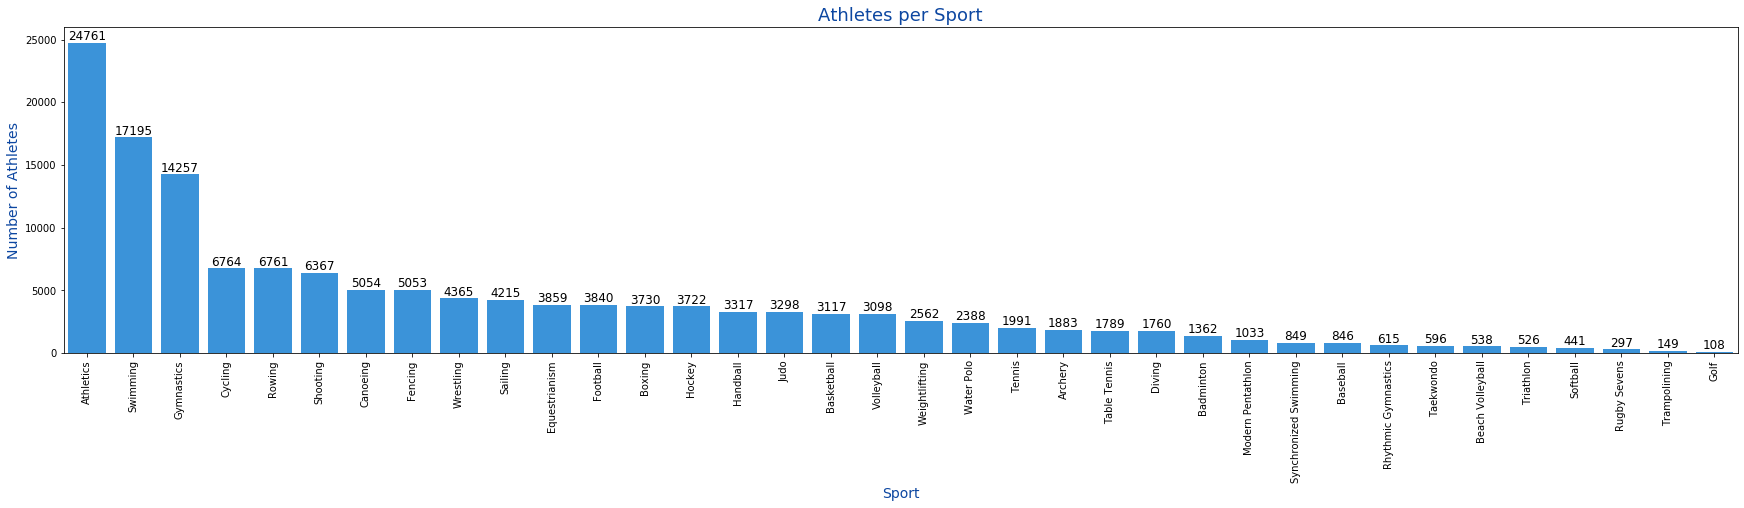

In [47]:
# number of athletes per sport

athletes_ps = AthletesFiltered_Summer[["Sport"]]
athletes_ps = athletes_ps["Sport"].value_counts()


#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_frame.html
athletes_per_sport = pd.DataFrame({"Sport":athletes_ps.index, "Athletes":athletes_ps.values})

fig, ax = plt.subplots(figsize=(30,6))
a = sns.barplot(x='Sport', y='Athletes', data=athletes_per_sport, ax=ax, color="#2196F3")
a.set_xticklabels(labels=athletes_per_sport['Sport'],rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

ax.set_xlabel('Sport', size=14, color="#0D47A1")
ax.set_ylabel('Number of Athletes', size=14, color="#0D47A1")
ax.set_title('Athletes per Sport', size=18, color="#0D47A1")
plt.show()


# Look a little more into the Athletics sport

As we see in the graph that the sport is athletics, which is a combination of many sports that are part of the track and field. 

https://tokyo2020.org/en/games/sport/olympic/athletics/
### Event Programme
* 100m (Men/Women)
* 200m (Men/Women)
* 400m (Men/Women)
* 800m (Men/Women)
* 1,500m (Men/Women)
* 5,000m (Men/Women)
* 10,000m (Men/Women)
* 110m Hurdles (Men)
* 100m Hurdles (Women)
* 400m Hurdles (Men/Women)
* 3,000m Steeplechase (Men/Women)
* 4 x 100m Relay (Men/Women)
* 4 x 400m Relay (Men/Women)
* 4 x 400m Mixed Relay

One concern that I have is that sprinters (100m and 200m) have very different body-types than mid and long-distance runners (10,000m) and this might make the categorization difficult. 

![SprintervsMarathoner](MarathonerSprinter.jpg)

In [61]:
# now let's do the actual filtering. 
ToFilter = ['Swimming', 'Gynmastics']

AthletesFiltered_Summer_Sports = AthletesFiltered_Summer.loc[AthletesFiltered_Summer['Sport'].isin(ToFilter)]



In [62]:
AthletesFiltered_Summer_Sports.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
100,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 100 metres Butterfly,NaN
101,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 200 metres Butterfly,NaN
102,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 4 x 100 metres Medley Relay,NaN
103,36,Stefan Remco Aartsen,M,25.0,194.0,78.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 100 metres Butterfly,NaN
104,36,Stefan Remco Aartsen,M,25.0,194.0,78.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 200 metres Butterfly,NaN


## So here is what we did instead

![NewData](AthletesToAnalyze.png)


In [63]:
# now let's do the actual filtering. 
ToFilter = ['Cycling', 'Rowing']

AthletesFiltered_Summer_Sports = AthletesFiltered_Summer.loc[AthletesFiltered_Summer['Sport'].isin(ToFilter)]


In [64]:
AthletesFiltered_Summer_Sports.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
92,30,Pepijn Aardewijn,M,26.0,189.0,72.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver
93,30,Pepijn Aardewijn,M,30.0,189.0,72.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Double Sculls,NaN
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
176,74,Mara Laura Abalo,F,30.0,182.0,73.0,Argentina,ARG,2012 Summer,2012,Summer,London,Rowing,Rowing Women's Coxless Pairs,NaN
195,90,Tamila Rashidovna Abasova,F,21.0,163.0,60.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Cycling,Cycling Women's Sprint,Silver


# Building TF Model

In order to build a tensorflow model. We are going to numerically encode our variables (more on that later), and build our training and test data

In [76]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [70]:
#DataToEncode = pd.DataFrame({"Sex": AthletesFiltered_Summer_Sports['Sex'], "Age": AthletesFiltered_Summer_Sports['Age'], "Height": AthletesFiltered_Summer_Sports['Height'],  "Weight": AthletesFiltered_Summer_Sports['Weight'],  "NOC": AthletesFiltered_Summer_Sports['NOC']})
DataToEncode = pd.DataFrame({"Sex": AthletesFiltered_Summer_Sports['Sex'], "Age": AthletesFiltered_Summer_Sports['Age'], "Height": AthletesFiltered_Summer_Sports['Height'],  "Weight": AthletesFiltered_Summer_Sports['Weight']})

DataToEncode.head()

,Sex,Age,Height,Weight
92,M,26.0,189.0,72.0
93,M,30.0,189.0,72.0
158,M,21.0,198.0,90.0
176,F,30.0,182.0,73.0
195,F,21.0,163.0,60.0


In [71]:
# making the training data into a numeric array
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
my_labelencoder = LabelEncoder()
DataToEncode['Sex'] = my_labelencoder.fit_transform(DataToEncode["Sex"])
#my_labelencoder2 = LabelEncoder()
#DataToEncode['NOC'] = my_labelencoder2.fit_transform(DataToEncode["NOC"])
InputAthleteData = DataToEncode.to_numpy()

In [72]:
# encoding the output variable

# why is this needed?
# Label encoding has introduced new problem in our data... Sports like Sailing and Wrestling have been given numbers, but one is not "higher" than another. These are now converted into dummy varaible
# resource : https://medium.com/@pushkarmandot/build-your-first-deep-learning-neural-network-model-using-keras-in-python-a90b5864116d

Y = AthletesFiltered_Summer_Sports["Sport"].values.tolist()
# lab
encoder = LabelEncoder()
dummy_y = encoder.fit_transform(Y)


## Splitting Training and Testing Data

We will make use of ScikitLearn’s ‘train_test_split’ function to divide our data (80:20)

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(InputAthleteData, dummy_y, test_size = 0.2)

## Scaling Input Data

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Standardize features by removing the mean and scaling to unit variance



In [75]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [82]:
# model itself
# simplest we cand o : uniform distribution for the kernel initialization
# activation is : Rectified Linear Unit (ReLU).
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [83]:
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [86]:
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

Epoch 1/100
 2390/10820 [=====>........................] - ETA: 0s - loss: 0.4222 - accuracy: 0.8167

/Users/willshin/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


10820/10820 [==============================] - 1s 82us/step - loss: 0.4163 - accuracy: 0.8178
Epoch 2/100
10820/10820 [==============================] - 1s 69us/step - loss: 0.4168 - accuracy: 0.8177
Epoch 3/100
10820/10820 [==============================] - 1s 69us/step - loss: 0.4162 - accuracy: 0.8188
Epoch 4/100
10820/10820 [==============================] - 1s 76us/step - loss: 0.4156 - accuracy: 0.8195
Epoch 5/100
10820/10820 [==============================] - 1s 99us/step - loss: 0.4164 - accuracy: 0.8173
Epoch 6/100
10820/10820 [==============================] - 1s 79us/step - loss: 0.4165 - accuracy: 0.8174
Epoch 7/100
10820/10820 [==============================] - 1s 71us/step - loss: 0.4166 - accuracy: 0.8206
Epoch 8/100
10820/10820 [==============================] - 1s 75us/step - loss: 0.4164 - accuracy: 0.8177
Epoch 9/100
10820/10820 [==============================] - 1s 71us/step - loss: 0.4162 - accuracy: 0.8201
Epoch 10/100
10820/10820 [==============================] 

In [81]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Confusion Matrix

![SprintervsMarathoner](ConfusionMatrixpng.png)

In [90]:
import tensorflow as tf     

con = tf.math.confusion_matrix(labels=y_test, predictions=y_pred )
con

<tf.Tensor: id=1625998, shape=(2, 2), dtype=int32, numpy=
array([[1116,  221],
       [ 274, 1094]], dtype=int32)>

In [91]:
# Accuracy: Overall, how often is the classifier correct?
# (TP+TN)/total = (1136+1061)/(1136 + 229 + 279 + 1061)
(1136+1061)/(1136 + 229 + 279 + 1061)

0.8121996303142329

In [93]:
# Accuracy: Overall, how often is the classifier correct?
# (TP+TN)/total = (1116+1094)/(1136 + 229 + 279 + 1061)
(1116+1094)/(1136 + 229 + 279 + 1061)

0.8170055452865065